# Trabajo práctico integrador: Aprendizaje de maquinas 1

Integrantes:
- Julio Agustín Donadello (a1505)
- Diego Braga (a1522)
- Eduardo Echeverria (a1516)
- Marco Joel Isidro (a1520)
- Diego Sarina (a1519)

# Introducción

Para el presente trabajo se utilizó un dataset sobre el clima en Australia, el cual contiene información sobre diferentes ciudades de Australia durante 10 años, incluyendo datos como la temperatura, la velocidad y dirección del viento, las precipitaciones, entre otros.

Dataset utilizado: [Kaggle - Rain in Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/data)

El dataset contiene las siguientes columnas:
* **Date:** fecha de la observación.
* **Location:** nombre de la ubicación de la estación meteorológica.
* **MinTemp:** temperatura mínima en grados Celsius.
* **MaxTemp:** temperatura máxima en grados Celsius.
* **Rainfall:** precipitaciones durante el día en mm.
* **Evaporation:** evaporación en mm durante 24h hasta las 9am.
* **Sunshine:** horas de sol en el día.
* **WindGustDir:** dirección de la ráfaga de viento más fuerte.
* **WindGustSpeed:** velocidad de la ráfaga de viento más fuerte en km/h.
* **WindDir9am:** dirección del viento a las 9am.
* **WindDir3pm:** dirección del viento a las 3pm.
* **WindSpeed9am:** velocidad del viento promediando los 10 minutos previos a las 9am en km/h.
* **WindSpeed3pm:** velocidad del viento promediando los 10 minutos previos a las 3pm en km/h.
* **Humidity9am:** humedad a las 9am en porcentaje.
* **Humidity3pm:** humedad a las 3pm en porcentaje.
* **Pressure9am:** presión a las 9am en hpa.
* **Pressure3pm:** presión a las 3pm en hpa.
* **Cloud9am:** Fracción del cielo cubierta por nubes a las 9am en oktas.
* **Cloud3pm:** Fracción del cielo cubierta por nubes a las 3pm en oktas.
* **Temp9am:** temperatura a las 9am en grados Celsius.
* **Temp3pm:** temperatura a las 3pm en grados Celsius.
* **RainToday:** si llovió hoy más de 1mm durante 24h hasta las 9am.
* **RainTomorrow:** si lloverá mañana.

Un dato importante a la hora de realizar el análisis exploratorio, la limpieza y la preparación de los datos es el objetivo que se busca alcanzar con el análisis. En este caso, el objetivo es predecir si lloverá al día siguiente o no, en función de los datos meteorológicos del día actual.

Antes de comenzar se importan todas las librerías necesarias con el objetivo de brindar claridad al código y facilitar su lectura.



**NOTA**: Utilizamos el mismo dataset para la materia "Analisis de Datos", en el cual nos familizariamos con el dataset, sus features, hicimos el analisis exploratorio, etc. Para esta oportunidad, tomaremos el dataset ya corregido que se encuentra en:

```
├── dataset
│   └── weatherAUS.csv
│   └── weather_corregido.csv
```

In [55]:
#generales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import scipy.stats as stats

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

import time
#configuraciones generales
pd.set_option('display.max_columns', None)

# Verificación de la correcta carga del dataset

In [2]:
#carga de los datos
weather_df = pd.read_csv("./dataset/dataset_corregido.csv")

#cantidad de elementos en el dataset
print(weather_df.shape)

(142193, 29)


In [3]:
# Visualizacion de las primeras 10 filas
weather_df.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day,Latitude,Longitude,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
0,13.4,22.9,0.6,9.48,9.88,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,1.8,16.9,21.8,0,0,12,2008,1,-36.0737,146.9135,-1.000000,-1.836970e-16,-1.000000e+00,-1.836970e-16,-0.923880,3.826834e-01
1,7.4,25.1,0.0,7.84,10.28,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.8,2.8,17.2,24.3,0,0,12,2008,2,-36.0737,146.9135,-0.923880,3.826834e-01,-3.826834e-01,9.238795e-01,-0.923880,-3.826834e-01
2,12.9,25.7,0.0,7.92,12.14,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.8,2.0,21.0,23.2,0,0,12,2008,3,-36.0737,146.9135,-0.923880,-3.826834e-01,-1.000000e+00,-1.836970e-16,-0.923880,-3.826834e-01
3,9.2,28.0,0.0,5.76,10.86,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,1.8,2.0,18.1,26.5,0,0,12,2008,4,-36.0737,146.9135,0.707107,7.071068e-01,7.071068e-01,-7.071068e-01,1.000000,6.123234e-17
4,17.5,32.3,1.0,6.00,8.44,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,2008,5,-36.0737,146.9135,-1.000000,-1.836970e-16,9.238795e-01,3.826834e-01,-0.707107,7.071068e-01
5,14.6,29.7,0.2,7.92,10.72,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,4.4,4.0,20.6,28.9,0,0,12,2008,6,-36.0737,146.9135,-0.923880,3.826834e-01,-1.000000e+00,-1.836970e-16,-1.000000,-1.836970e-16
6,14.3,25.0,0.0,9.56,12.22,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,1.4,18.1,24.6,0,0,12,2008,7,-36.0737,146.9135,-1.000000,-1.836970e-16,-7.071068e-01,-7.071068e-01,-1.000000,-1.836970e-16
7,7.7,26.7,0.0,6.24,10.32,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,1.4,3.8,16.3,25.5,0,0,12,2008,8,-36.0737,146.9135,-1.000000,-1.836970e-16,3.826834e-01,-9.238795e-01,-1.000000,-1.836970e-16
8,9.7,31.9,0.0,10.60,9.86,73.5,7.0,28.0,42.0,9.0,1008.9,1003.6,2.4,3.4,18.3,30.2,0,1,12,2008,9,-36.0737,146.9135,-0.382683,9.238795e-01,7.071068e-01,-7.071068e-01,-0.707107,7.071068e-01
9,13.1,30.1,1.4,7.44,10.32,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,1.8,2.8,20.1,28.2,1,0,12,2008,10,-36.0737,146.9135,-1.000000,-1.836970e-16,1.224647e-16,-1.000000e+00,0.382683,-9.238795e-01


In [4]:
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Year,Day,Latitude,Longitude,WindGustDir_sin,WindGustDir_cos,WindDir9am_sin,WindDir9am_cos,WindDir3pm_sin,WindDir3pm_cos
count,142193.000000,142193.000000,142193.000000,142193.000000,1.421930e+05,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,1.421930e+05,142193.000000,1.421930e+05,142193.000000,1.421930e+05
mean,12.189307,23.230659,2.086360,5.036038,7.460096e+00,39.745423,13.889312,18.478234,69.007328,51.551311,1017.757111,1015.346671,4.427065,4.474846,16.964937,21.720343,0.221305,0.224181,6.402544,2012.758926,15.715084,-32.756418,142.088448,-0.033483,-5.555817e-02,0.013028,2.146866e-02,-0.017099,-4.611899e-02
std,6.400692,7.097391,5.987946,3.124743,3.515770e+00,12.559388,8.571594,8.509579,18.880984,20.697823,6.854832,6.795818,2.619236,2.426317,6.498296,6.938985,0.415127,0.417043,3.426506,2.541256,8.798150,6.037345,12.081071,0.721006,6.898907e-01,0.690669,7.227397e-01,0.712556,6.998942e-01
min,-6.350000,2.450000,0.000000,0.000000,-8.881784e-16,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,0.000000,0.000000,-1.650000,1.900000,0.000000,0.000000,1.000000,2007.000000,1.000000,-42.882100,115.100000,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00,-1.000000,-1.000000e+00
25%,7.600000,17.900000,0.000000,2.600000,4.900000e+00,31.000000,7.000000,13.000000,57.000000,37.000000,1013.200000,1010.700000,2.000000,2.400000,12.200000,16.600000,0.000000,0.000000,3.000000,2011.000000,8.000000,-36.073700,138.600700,-0.707107,-7.071068e-01,-0.707107,-7.071068e-01,-0.707107,-7.071068e-01
50%,12.000000,22.600000,0.000000,4.480000,8.080000e+00,39.000000,13.000000,19.000000,70.000000,52.000000,1017.700000,1015.300000,5.000000,4.800000,16.700000,21.100000,0.000000,0.000000,6.000000,2013.000000,16.000000,-33.939900,145.838000,0.000000,-1.836970e-16,0.000000,6.123234e-17,0.000000,-1.836970e-16
75%,16.900000,28.200000,0.600000,6.800000,1.030000e+01,46.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1019.960000,7.000000,7.000000,21.500000,26.450000,0.000000,0.000000,9.000000,2015.000000,23.000000,-31.499600,150.773800,0.707107,7.071068e-01,0.707107,7.071068e-01,0.707107,7.071068e-01
max,30.850000,43.650000,40.000000,14.600000,1.450000e+01,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,8.000000,8.000000,35.550000,41.100000,1.000000,1.000000,12.000000,2017.000000,31.000000,-12.463400,167.954700,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00


In [5]:
#análisis rápido de los tipos de datos de cada variable
print(f"Dataset info: \n{weather_df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   MinTemp          142193 non-null  float64
 1   MaxTemp          142193 non-null  float64
 2   Rainfall         142193 non-null  float64
 3   Evaporation      142193 non-null  float64
 4   Sunshine         142193 non-null  float64
 5   WindGustSpeed    142193 non-null  float64
 6   WindSpeed9am     142193 non-null  float64
 7   WindSpeed3pm     142193 non-null  float64
 8   Humidity9am      142193 non-null  float64
 9   Humidity3pm      142193 non-null  float64
 10  Pressure9am      142193 non-null  float64
 11  Pressure3pm      142193 non-null  float64
 12  Cloud9am         142193 non-null  float64
 13  Cloud3pm         142193 non-null  float64
 14  Temp9am          142193 non-null  float64
 15  Temp3pm          142193 non-null  float64
 16  RainToday        142193 non-null  int6

In [6]:
dtypes = weather_df.dtypes 
num_columns = dtypes[dtypes == 'int64'].count() + dtypes[dtypes == 'float64'].count()
cat_columns = dtypes[dtypes == 'object'].count()
print(f"Cant. features numéricos: {num_columns} \nCant. features no numéricos: {cat_columns}")

Cant. features numéricos: 29 
Cant. features no numéricos: 0


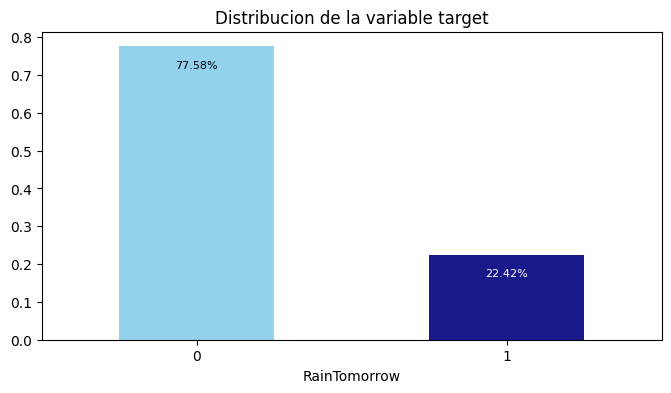

RainToday
0    0.778695
1    0.221305
Name: proportion, dtype: float64


In [8]:
fig = plt.figure(figsize=(8, 4))
ax = weather_df.RainTomorrow.value_counts(normalize=True).plot(kind='bar',color= ['skyblue','navy'], alpha=0.9, rot=0)

for idx, p in enumerate(ax.patches):
    color = 'black' if idx == 0 else 'white'
    ax.annotate(f'{p.get_height():.2%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='top',
                xytext=(0, -10), # ajusto la etiqueta
                textcoords='offset points',
                fontsize=8,
                color=color)
plt.title('Distribucion de la variable target')
plt.show()

print(weather_df["RainToday"].value_counts(normalize=True))

Del analisis anterior, podemos visualizar que el target no esta balanceado, lo cual puede traer problemas a la hora de entrenar el modelo.

In [9]:
# Voy a revisar ahora que no tengo datos nulos
missing_values=weather_df.isnull().sum() # missing values

percent_missing = weather_df.isnull().sum()/weather_df.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing , 
     'data type' : weather_df.dtypes
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %,data type
MinTemp,0,0.0,float64
MaxTemp,0,0.0,float64
Rainfall,0,0.0,float64
Evaporation,0,0.0,float64
Sunshine,0,0.0,float64
WindGustSpeed,0,0.0,float64
WindSpeed9am,0,0.0,float64
WindSpeed3pm,0,0.0,float64
Humidity9am,0,0.0,float64
Humidity3pm,0,0.0,float64


# Definición del baseline y selección del modelo a utilizar


## Baseline

In [10]:
# Se separa el target del resto de las features
X = weather_df.drop(columns='RainTomorrow')
y = weather_df['RainTomorrow']

In [12]:
# Se separa el conjunto de entrenamiento y testeo en 70% y 30% respectivamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234)

In [13]:
# Opción 1 de baseline: Predice siempre que no va a llover
rain_tomorrow_freq = y_test.value_counts(normalize=True)
y_pred_baseline1_test = rain_tomorrow_freq.idxmax()
y_pred_baseline1_test = np.array([y_pred_baseline1_test] * len(y_test))

In [14]:
# Opción 2 de baseline: Predice que si va a llover o no asumiendo que pasará lo mismo que hoy. 
y_pred_baseline2_test = X_test['RainToday']

In [16]:
# Se escalan los datos
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train) 
X_test = sc_X.transform(X_test)

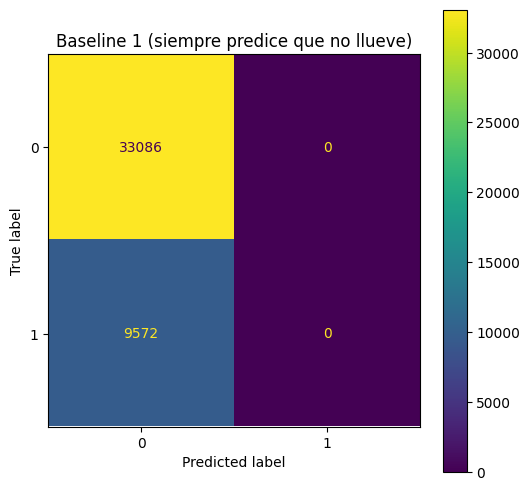

In [17]:
cm_baseline1 = confusion_matrix(y_test, y_pred_baseline1_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline1)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Baseline 1 (siempre predice que no llueve)");

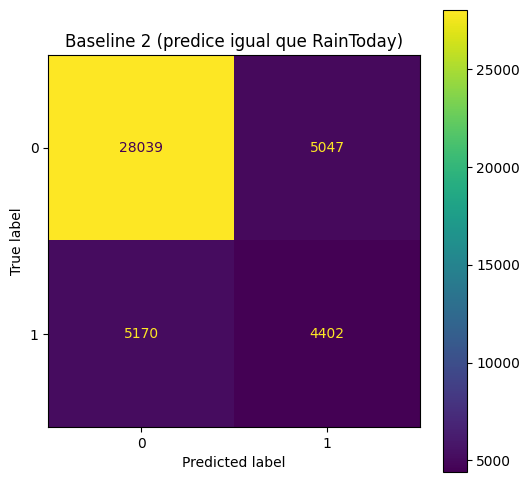

In [18]:
cm_baseline2 = confusion_matrix(y_test, y_pred_baseline2_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_baseline2)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Baseline 2 (predice igual que RainToday)");

In [19]:
def model_stats(modelname, confusion_matrix, y_test, y_pred):
    print(f"Estadisticas para el modelo: {modelname}")
    P = np.sum(confusion_matrix[1, :])
    N = np.sum(confusion_matrix[0, :])
    TP = confusion_matrix[1, 1]
    TN = confusion_matrix[0, 0]
    TPR = TP/P
    TNR = TN/N
    print(f"Sensibilidad: {TP/P}")
    print(f"Especificidad: {TN/N}")
    print(f"Exactitud balanceada: {(TPR + TNR)/2}")
    print(f"Precision: {precision_score(y_test, y_pred, zero_division=0)}")
    print(f"Recuperación: {recall_score(y_test, y_pred, zero_division=0)}")
    print(f"F1-score: {f1_score(y_test, y_pred, zero_division=0)}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"======================")

In [20]:
# Se evalúan métricas para ambos modelos
model_stats("Baseline 1", cm_baseline1, y_test, y_pred_baseline1_test)
model_stats("Baseline 2", cm_baseline2, y_test, y_pred_baseline2_test)

Estadisticas para el modelo: Baseline 1
Sensibilidad: 0.0
Especificidad: 1.0
Exactitud balanceada: 0.5
Precision: 0.0
Recuperación: 0.0
F1-score: 0.0
Accuracy: 0.7756106709175301
Estadisticas para el modelo: Baseline 2
Sensibilidad: 0.4598829920601755
Especificidad: 0.8474581393943057
Exactitud balanceada: 0.6536705657272406
Precision: 0.4658694041697534
Recuperación: 0.4598829920601755
F1-score: 0.4628568424373061
Accuracy: 0.7604904121149608


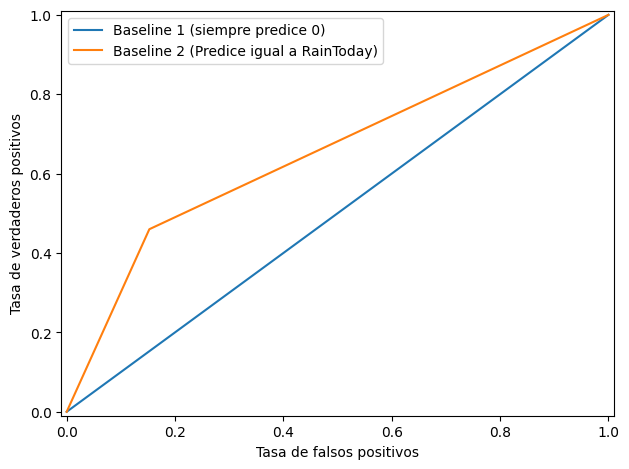

In [23]:
fpr_baseline1, tpr_baseline1, _ = roc_curve(y_test, y_pred_baseline1_test)
fpr_baseline2, tpr_baseline2, _ = roc_curve(y_test, y_pred_baseline2_test)

plt.plot(fpr_baseline1, tpr_baseline1, label="Baseline 1 (siempre predice 0)")
plt.plot(fpr_baseline2, tpr_baseline2, label="Baseline 2 (Predice igual a RainToday)")
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel("Tasa de falsos positivos")
plt.ylabel("Tasa de verdaderos positivos")
plt.legend()
plt.tight_layout()

In [25]:
print(f"AUC (baseline 1): {auc(fpr_baseline1, tpr_baseline1)}")
print(f"AUC (baseline 2): {auc(fpr_baseline2, tpr_baseline2)}")

AUC (baseline 1): 0.5
AUC (baseline 2): 0.6536705657272406


**Nota:** De los estudios anteriores, podemos ver que entre ambos **baselines** vamos a optar por utilizar el segundo (baseline 2) dado que tiene un AUC mayor y ademas nos permite analizar mejor las metricas para el modelo. No como el primer caso donde todas las metricas son valores redondos dificiles de comparar.

## Feature selection 

Ahora vamos a analizar un poco mas el dataset en busqueda de features que podamos eliminar para cumplir el principio de:

` garbage in -> garbage out`

Si bien en el notebook de analisis de datos ya se realizo un analisis de las features, vamos a utilizar nuevas herramientas para poder tener una vision mas clara de las features que vamos a utilizar.

In [26]:
features_list = list(weather_df.columns.values)
features_list.remove("RainTomorrow")

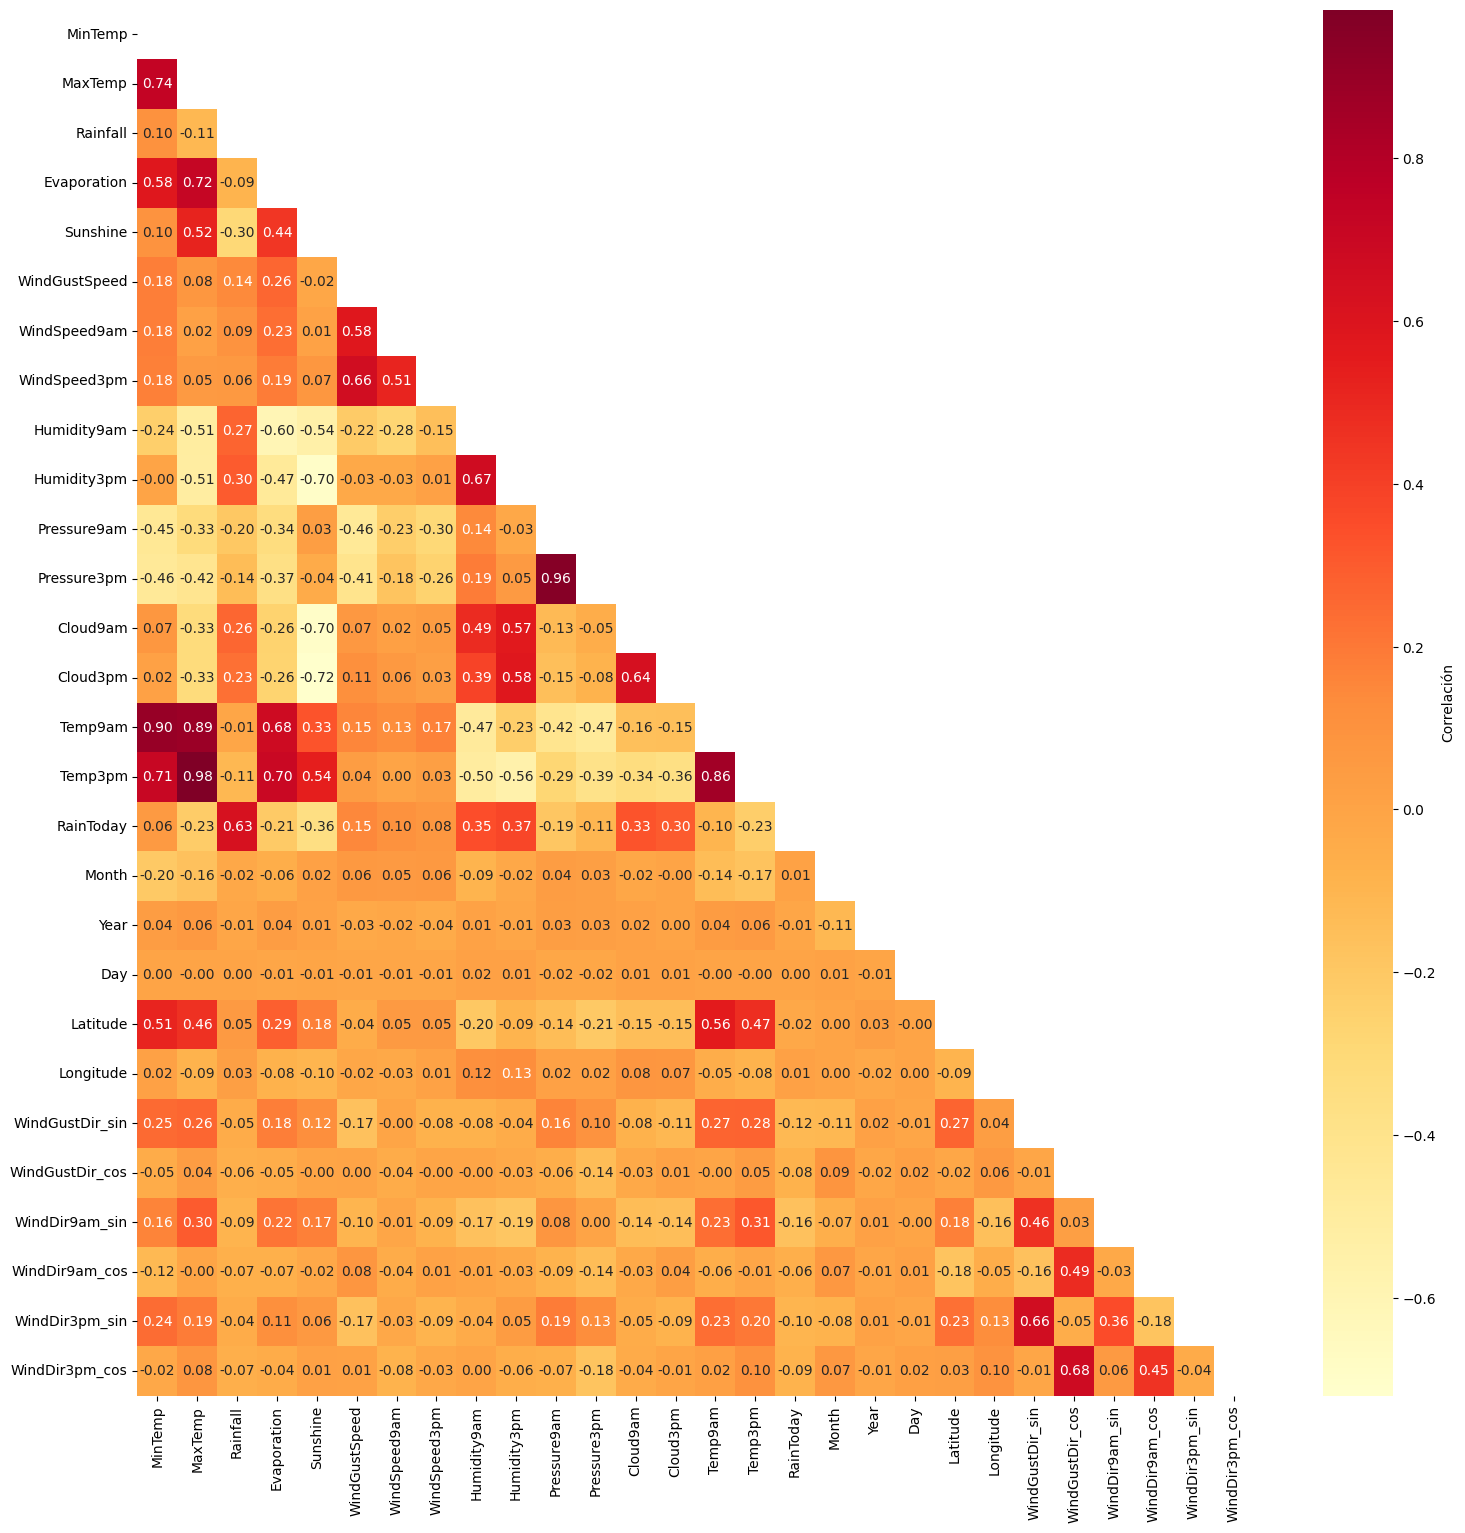

In [28]:
# correlación seaborn entre variables numéricas
plt.figure(figsize=(18,18))

corr_weather = weather_df[features_list].corr()
mask = np.triu(np.ones_like(corr_weather, dtype=bool))
sns.heatmap(corr_weather, mask=mask,annot=True, cmap='YlOrRd', fmt=".2f", cbar_kws={'label': 'Correlación'})
plt.show()

De la matriz de correlacion, podemos ver que teenmos una correlacion muy fuerte (>80) entre:

- Temp9am y MinTemp
- Temp3pm y MaxTemp
- Pressure9am y Pressure3pm
- Temp3pm y Temp9am

Y luego tenemos otro sub conjunto de correlacion menos fuertes pero que estan entre el 0.6 y el 80%:
- WindDier3pm_cos & WindGustDir_cos
- WindDier3pm_sin & WindGustDir_sin
- Cloud9am & Cloud9pm
- Humidity9am & Humidity3am
- Evaporation & MaxTemp
- WindSpeed3pM & WindGustSpeed

Para evitar problemas en el modelo debido a la alta colinealidad entre variables, vamos a eliminar las features que se encuentran en el primer subgrupo (>80%) dado que las mismas no le aportan informacion relevante al modelo.

In [30]:
# Eliminacion de features con alta correlación
to_delete = ["Temp9am", "Temp3pm", "Pressure9am"]
weather_df.drop(to_delete, axis=1, inplace=True)

In [31]:
(weather_df.columns.values)

array(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday',
       'RainTomorrow', 'Month', 'Year', 'Day', 'Latitude', 'Longitude',
       'WindGustDir_sin', 'WindGustDir_cos', 'WindDir9am_sin',
       'WindDir9am_cos', 'WindDir3pm_sin', 'WindDir3pm_cos'], dtype=object)

Seleccionar características mediante el método de filtrado (valor de chi-cuadrado): antes de hacer esto, primero debemos normalizar nuestros datos. 


Usamos MinMaxScaler en lugar de StandardScaler dado que el ultimo esta recomendado para escenarios donde nuestra distribucion de datos se asemeja a una normal. En nuestro caso eso solo sucede en ciertas variables como la de la temperatura y la presion, luego para otras variables no se asemejan a una normal. Por eso utilizamos el MinMaxScaler


In [33]:
# Standardizing data
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(weather_df)
modified_data = pd.DataFrame(r_scaler.transform(weather_df), index=weather_df.index, columns=weather_df.columns)

In [36]:
# Feature Importance using Filter Method (Chi-Square)
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Humidity9am',
       'Humidity3pm', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


In [37]:
# Selecciono las features con un random forest 
X = weather_df.drop('RainTomorrow', axis=1)
y = weather_df['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm']
[0.04187043 0.04160274 0.04502473 0.03688944 0.10929397 0.050307
 0.02634924 0.02845225 0.04250926 0.13469338 0.0714574  0.03673759
 0.05546217 0.02148281 0.02189293 0.02205299 0.03176461 0.02889039
 0.03606964 0.01868977 0.01970773 0.01847707 0.02048164 0.01877029
 0.02107053]


## Selección del modelo

Dividiremos el conjunto de datos en conjuntos de entrenamiento (75%) y de prueba (25%) respectivamente para entrenar el modelo de predicción de lluvia. Para obtener mejores resultados, estandarizaremos nuestros datos X_train y X_test:

En este caso vamos a hacer uso de todas la features del dataset

In [38]:
features_list = list(weather_df.columns.values)

In [39]:
features_list.remove("RainTomorrow")
features_list

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'RainToday',
 'Month',
 'Year',
 'Day',
 'Latitude',
 'Longitude',
 'WindGustDir_sin',
 'WindGustDir_cos',
 'WindDir9am_sin',
 'WindDir9am_cos',
 'WindDir3pm_sin',
 'WindDir3pm_cos']

In [40]:
features = weather_df[features_list]
target = weather_df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [47]:
# Standardizing data
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(features)
X_train = pd.DataFrame(r_scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(r_scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [48]:
# Función para ejecutar y evaluar el modelo
def run_model(model, X_train, y_train, X_test, y_test, modelname):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probs = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, probs)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time() - start_time

    # Plot ROC curve
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    # Plot Confusion Matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)
    plt.show()

    matrix = confusion_matrix(y_test, y_pred)

    model_stats(modelname, matrix, y_test, y_pred)

    return model, accuracy, roc_auc, coh_kap, time_taken

# Función para graficar la curva ROC
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

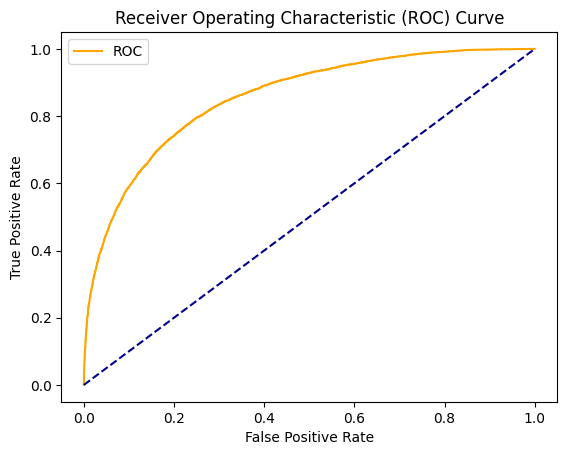

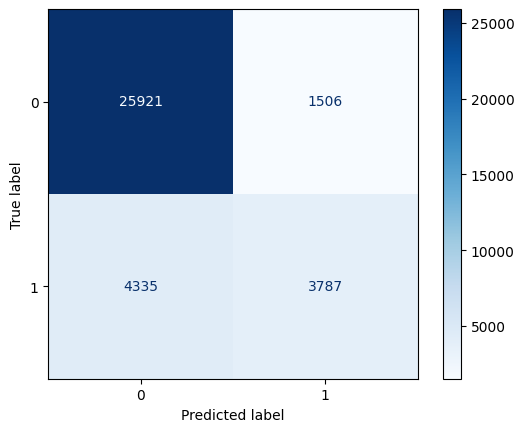

Estadisticas para el modelo: Regresion Logistica
Sensibilidad: 0.4662644668800788
Especificidad: 0.9450906041491961
Exactitud balanceada: 0.7056775355146374
Precision: 0.7154732665784999
Recuperación: 0.4662644668800788
F1-score: 0.5645918747670519
Accuracy: 0.8356915806351796


In [49]:
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test, "Regresion Logistica")

**NOTA:** Vemos que el F1-score en este modelo simple funciona mejor que las baselines que propusimos.

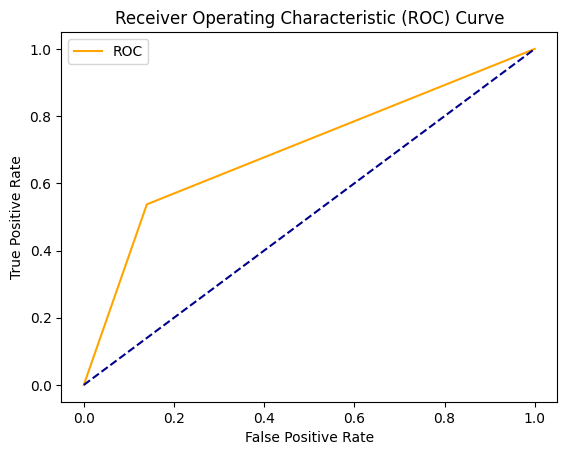

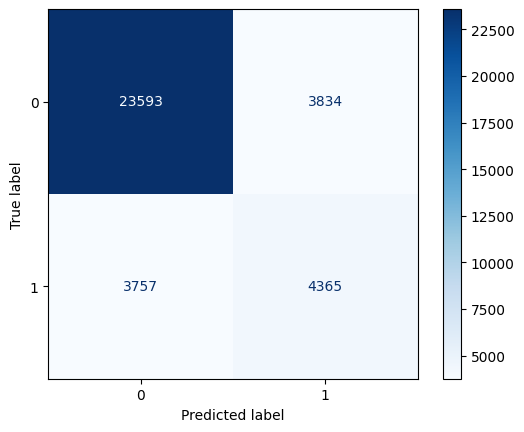

Estadisticas para el modelo: Arbol de desición
Sensibilidad: 0.5374292046294016
Especificidad: 0.8602107412403835
Exactitud balanceada: 0.6988199729348925
Precision: 0.5323819978046103
Recuperación: 0.5374292046294016
F1-score: 0.5348936952392623
Accuracy: 0.7864637542546907


In [50]:
params_dt = {'max_depth': 30,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test, "Arbol de desición")

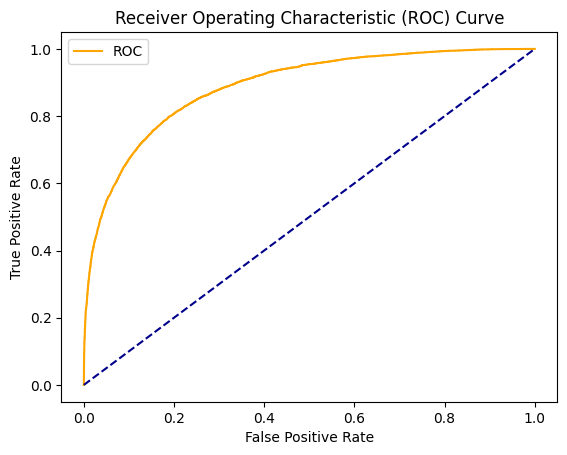

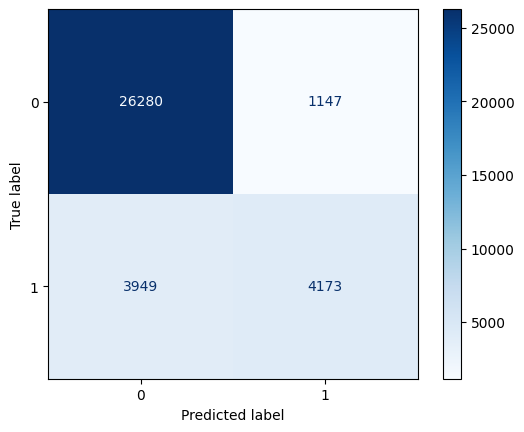

Estadisticas para el modelo: Random Forest
Sensibilidad: 0.513789706968727
Especificidad: 0.9581798957231925
Exactitud balanceada: 0.7359848013459598
Precision: 0.7843984962406015
Recuperación: 0.513789706968727
F1-score: 0.620889748549323
Accuracy: 0.8566485695800163


In [51]:
params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = rf(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test, "Random Forest")

c:\Users\marco\AppData\Local\pypoetry\Cache\virtualenvs\ad-tp-integrador-EBfo4Zcj-py3.11\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\marco\AppData\Local\pypoetry\Cache\virtualenvs\ad-tp-integrador-EBfo4Zcj-py3.11\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Number of positive: 23755, number of negative: 82889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2081
[LightGBM] [Info] Number of data points in the train set: 106644, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.222750 -> initscore=-1.249709
[LightGBM] [Info] Start training from score -1.249709


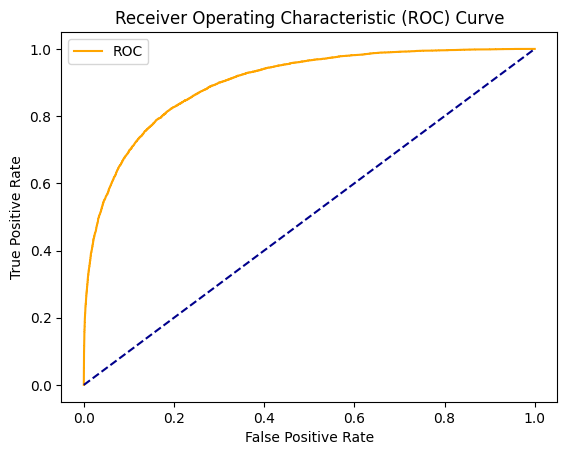

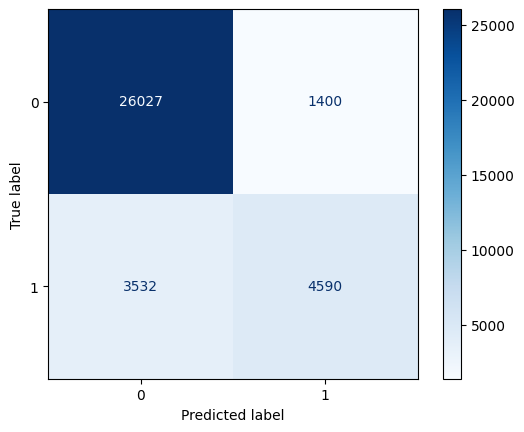

Estadisticas para el modelo: LightGBM
Sensibilidad: 0.5651317409505048
Especificidad: 0.9489554089036351
Exactitud balanceada: 0.7570435749270699
Precision: 0.7662771285475793
Recuperación: 0.5651317409505048
F1-score: 0.6505102040816326
Accuracy: 0.8612619201665307


In [54]:
# Light GBM
params_lgb ={'colsample_bytree': 0.95, 
         'max_depth': 16, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test, "LightGBM")

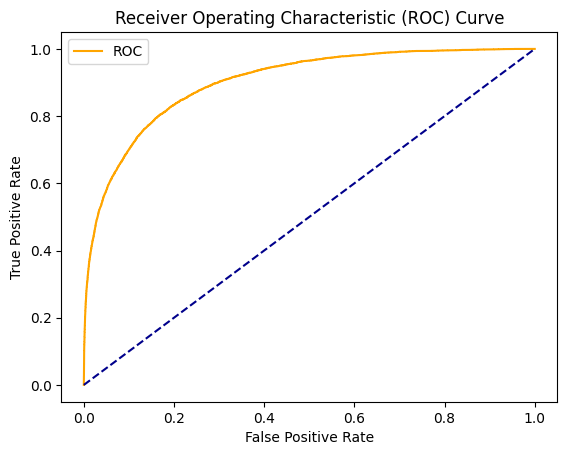

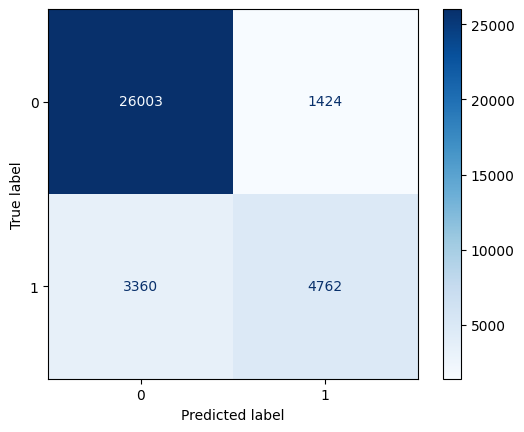

Estadisticas para el modelo: XGB
Sensibilidad: 0.5863087909381925
Especificidad: 0.9480803587705545
Exactitud balanceada: 0.7671945748543736
Precision: 0.7698027804720337
Recuperación: 0.5863087909381925
F1-score: 0.6656415991053956
Accuracy: 0.8654251877689949


In [56]:
# XGBoost
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test, "XGB")

C:\Users\marco\AppData\Local\Temp\ipykernel_18700\2041274728.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Model', y='Accuracy', data = data, palette='summer')


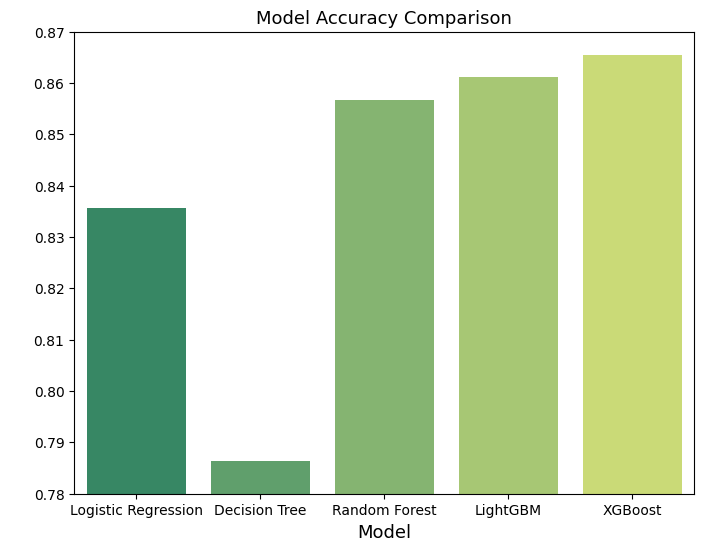

In [58]:
# Model Comparison
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_lgb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_lgb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_lgb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_rf, tt_lgb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','LightGBM','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              #'Time taken': tt
              }
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(8,6))
ax1.set_title('Model Accuracy Comparison', fontsize=13)
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Accuracy', fontsize=13, color=color)
ax1.set(ylim=(0.78, 0.87))
ax1 = sns.barplot(x='Model', y='Accuracy', data = data, palette='summer')
ax1.tick_params(axis='y')

**NOTA:** A partir de los datos anteriores podemos ver como el XGBoost es el modelo que mejor performa. A partir de este vamos a trabajar mejorarndo nuestro modelo ... 

# Entrenamiento del modelo

## Construccion de modelos alternativos

A partir de que el modelo XGBoost fue el mejor, voy a empezar a entrenar dicho modelo pero modificando el dataset y quedandome con las features mas importante que fueron encontradas en el paso anterior

In [ ]:
# Features encontradas con el Random Forest

#dataset_

['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure3pm', 'Cloud3pm']